In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [175]:
df=pd.read_csv("./teacher_data.csv") #讀csv
print(df)

      age gender  height  weight attitude  prepare_hours class_type pass_rate  \
0      43      F     180      67  Serious              5   Physical      High   
1      52      M     157      50  Serious              5   Physical      High   
2      36      M     161      42  Serious              3   Physical      High   
3      52      M     162      54  Serious              6   Physical      High   
4      28      M     179      41  Serious              0     Online       Low   
...   ...    ...     ...     ...      ...            ...        ...       ...   
5995   30      M     145      81  Serious              3   Physical      High   
5996   57      F     171      58  Serious              5   Physical      High   
5997   38      F     151      66  Serious              6   Physical      High   
5998   52      F     151      92  Serious              6     Online       Low   
5999   64      M     140     100  Serious              3   Physical      High   

      glasses classhw care 

In [176]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["gender"]=label_encoder.fit_transform(df["gender"]) # 對gender做label Encoder
df["attitude"]=label_encoder.fit_transform(df["attitude"]) # 對attitude做label Encoder
df["class_type"]=label_encoder.fit_transform(df["class_type"]) # 對class_type做label Encoder
df["pass_rate"]=label_encoder.fit_transform(df["pass_rate"]) # 對pass_rate做label Encoder
df["classhw"]=label_encoder.fit_transform(df["classhw"]) # 對classhw做label Encoder
df["care"]=label_encoder.fit_transform(df["care"]) # 對care做label Encoder
df["label"]=label_encoder.fit_transform(df["label"]) # 對label做label Encoder
print(df)

      age  gender  height  weight  attitude  prepare_hours  class_type  \
0      43       0     180      67         1              5           1   
1      52       1     157      50         1              5           1   
2      36       1     161      42         1              3           1   
3      52       1     162      54         1              6           1   
4      28       1     179      41         1              0           0   
...   ...     ...     ...     ...       ...            ...         ...   
5995   30       1     145      81         1              3           1   
5996   57       0     171      58         1              5           1   
5997   38       0     151      66         1              6           1   
5998   52       0     151      92         1              6           0   
5999   64       1     140     100         1              3           1   

      pass_rate  glasses  classhw  care  label  
0             0        0        0     1      1  
1            

In [177]:
df=df.dropna()
print("當前資料缺失值總數:",len(np.where(np.isnan(df))[0]))

當前資料缺失值總數: 0


In [178]:
from sklearn.model_selection import train_test_split
X=df.drop(labels=["label"],axis=1).values #沒label
y=df["label"].values #有label
print("X:\n",X)
print("y:\n",y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print("Training data shape:",X_train.shape)
print("Testing data shape:",X_test.shape)

X:
 [[ 43   0 180 ...   0   0   1]
 [ 52   1 157 ...   0   1   1]
 [ 36   1 161 ...   1   0   1]
 ...
 [ 38   0 151 ...   0   2   1]
 [ 52   0 151 ...   0   0   1]
 [ 64   1 140 ...   0   2   1]]
y:
 [1 1 1 ... 1 0 1]
Training data shape: (4500, 11)
Testing data shape: (1500, 11)


建立 k-nearest neighbors(KNN) 模型

Parameters:
。n_neighbors: 設定鄰居的數量(k)，選取最近的k個點，預設為5。
。algorithm: 搜尋數演算法{'auto'，'ball_tree'，'kd_tree'，'brute'}，可選。
。metric: 計算距離的方式，預設為歐幾里得距離。

Attributes:
。classes_: 取得類別陣列。
。effective_metric_: 取得計算距離的公式。

Methods:
。fit: 放入X、y進行模型擬合。
。predict: 預測並回傳預測類別。
。score: 預測成功的比例。

In [179]:
from sklearn.manifold import TSNE # 進行TSNE降維，降成2維

tsneModel = TSNE(n_components=2, random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)
test_reduced = tsneModel.fit_transform(X_test)

c:\Users\User\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


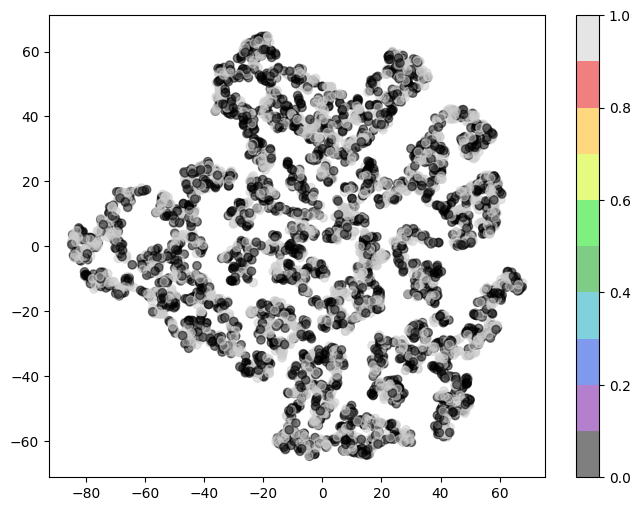

In [180]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

In [189]:
from sklearn.neighbors import KNeighborsClassifier

# 建立KNN模型
knnModel = KNeighborsClassifier(n_neighbors=2)
# 使用訓練資料訓練模型
knnModel.fit(train_reduced,y_train) # 降維資料
# 預測成功的比例
print('Training Set Accuracy: ',knnModel.score(train_reduced,y_train))
print('Testing Set Accuracy: ',knnModel.score(test_reduced,y_test))

Training Set Accuracy:  0.8004444444444444
Testing Set Accuracy:  0.48133333333333334
